<a href="https://colab.research.google.com/github/henrykohl/Machine-Learning-demo-repo/blob/master/case-study/kerasnotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sec 1 -- [<font color="red">函式庫－Keras</font>](https://ithelp.ithome.com.tw/articles/10224345)

> 參考 -- [Keras Dense layer Output Shape](https://stackoverflow.com/questions/61560888/keras-dense-layer-output-shape)

In [ ]:
!pip uninstall keras

Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/keras-3.8.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-3.8.0


In [ ]:
from keras.models import Sequential #引入Sequential函式
from keras.layers import Dense, Activation, Input #引入層數及激勵函數

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 示範建立model (參考) https://stackoverflow.com/questions/61560888/keras-dense-layer-output-shape
model_example = Sequential([
    Dense(512, input_shape=(784,)), # deprecated
    Activation('relu'), #設定激活層並採用relu
])
print(model_example.summary()) #顯示目前網路架構 (param # = 784*512+512 = 401920)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401,920 (1.53 MB)

 Trainable params: 401,920 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# 修改版 -- 修正 `Do not pass an `input_shape`/`input_dim` argument to a layer.` 警告
model_example = Sequential([
    Input(shape=(784,)),
    Dense(512),
    Activation('relu'),
])
print(model_example.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 512)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401,920 (1.53 MB)

 Trainable params: 401,920 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

None


Dense：全連接層 units=512 簡化成 512

輸入的張量，784神經元(或稱組數輸入)

512是輸出的神經元數量(或稱組數)

In [ ]:
import numpy as np

y_data = np.array([500000,275000,360000,780000,145000,280000,860000,200000,90000,680000])
x_data = np.array([55,27,33,70,13,26,89,21,10,67])

In [ ]:
# from keras import optimizers (沒法直接調用 SGD)

In [ ]:
keras.__version__

'3.8.0'

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()
model.add(Dense(1,input_shape=(1,))) #加入神經層第一層(1維)輸出1維(因為資料和輸出都是一維的)
# sgd = optimizers.SGD(lr=0.0001)
# sgd = optimizers.gradient_descent_v2.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
# sgd = optimizers.gradient_descent_v2.SGD(lr=0.0001)
sgd = SGD(learning_rate=0.0001) # lr 已經不能用了

#sgd是隨機梯度下降法，括號內學習率寫0.0001(資料比較少，過大的學習率會無法找到最佳解)
model.compile(loss = 'mse',optimizer = sgd) #設定model的loss和優化器(分別是MSE和SGD)

model.fit(x_data,y_data,epochs = 200) #1.x資料(坪數)2.y標籤(房價)3.epcohs是指疊代200次
pred = model.predict(x_data) #訓練好model使用predict預測看看在訓練的model跑的回歸線
W, b = model.layers[0].get_weights() #抓出全重和偏差
print('Weights=', W, '\nbiases=', b)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - loss: 241327931392.0000
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 68374077440.0000
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 19960506368.0000
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 6408479744.0000
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 2614970880.0000
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1553084032.0000
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1255837440.0000
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1172630528.0000
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1149338368.0000
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1142817024.0000
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1140990976.0000
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1140478976.0000
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1140333824.0000
Epoch 14/200
1/1 ━━━━━━━━━━━

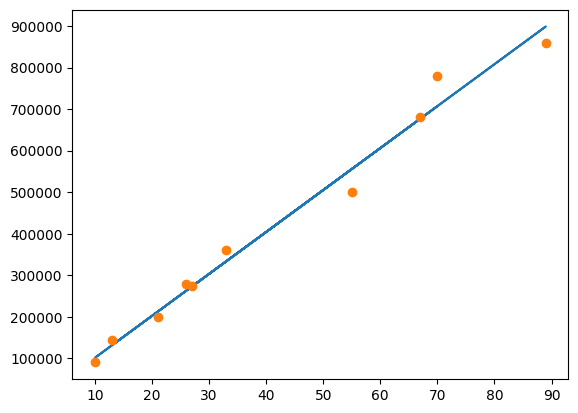

In [ ]:
plt.plot(x_data,pred) #畫出回歸線
plt.plot(x_data, y_data, 'o') #畫出原本的點

# Sec 2 -- [<font color="red">Keras 手寫辨識 MNIST</font>](https://medium.com/bryanyang0528/deep-learning-keras-mnist-b41757567684)

記得開啟 GPU ~~

In [ ]:
# 展示
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12412716363855166980
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9664323038511721405
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D, ReLU
from keras.layers import Input # (新增 6/11/2025)
# from keras.optimizers import RMSprop (錯誤)
from tensorflow.keras.optimizers import RMSprop

from matplotlib.pyplot import imshow
import numpy as np

In [ ]:
keras.__version__

'3.8.0'

In [ ]:
# 只能在 Tensorflow 1.X 運行
from keras import backend as K # 或 import tensorflow.keras.backend as K
K.tensorflow_backend._get_available_gpus()

AttributeError: module 'keras.api.backend' has no attribute 'tensorflow_backend'

* 參考解決方式:[module 'keras.backend' has no attribute 'tensorflow_backend'](https://stackoverflow.com/questions/63049620/module-keras-backend-has-no-attribute-tensorflow-backend)

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_built_with_cuda

<function tensorflow.python.platform.test.is_built_with_cuda()>

In [ ]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x_train = x_train.reshape(60000, 784) # x_train 的原大小是 (60000, 28, 28)
x_test = x_test.reshape(10000, 784)  # x_test 的原大小是 (10000, 28, 28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # 原本每一個位置其值 0~255，歸一化後其值 0~1
x_test /= 255 # 原本每一個位置其值 0~255，歸一化後其值 0~1
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
type(x_train), type(x_test)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# convert class vectors to binary class matrices 十進制轉one-hot code
# y_train_c = keras.utils.to_categorical(y_train, num_classes) # 新版tensorflow不能用了
# y_test_c = keras.utils.to_categorical(y_test, num_classes)   # 新版tensorflow不能用了

# y_train_c = keras.utils.np_utils.to_categorical(y_train, num_classes=10)
# y_test_c = keras.utils.np_utils.to_categorical(y_test, num_classes=10)

y_train_c = keras.utils.to_categorical(y_train, num_classes=10)
y_test_c = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
# (展示) 第1筆資料的label，轉換前與轉換後的結果
y_train_c[0], y_train[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), np.uint8(5))

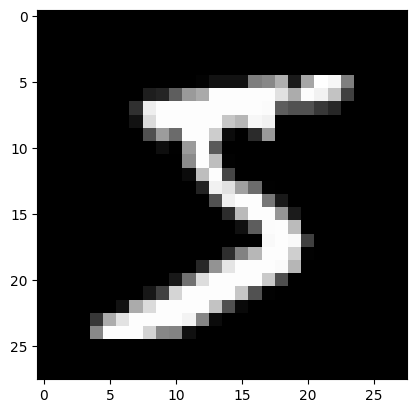

In [ ]:
# 展示用
x_sample_0 = x_train[0].reshape(28,28)
imshow(x_sample_0, cmap='gray')

In [ ]:
# 避免 "so returning NUMA node zero" 解決辦法
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
model = Sequential()
model.add(Dense(20, activation=LeakyReLU(), input_shape=(784,)))
model.add(Dense(20, activation=LeakyReLU()))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 修正 `input_shape` 的 Warning
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(20, activation=LeakyReLU()))
model.add(Dense(20, activation=LeakyReLU()))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
# y_train與y_test 改成了 y_train_c與y_test_c
batch_size = 128
num_classes = 10
epochs = 10
history = model.fit(x_train, y_train_c,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_c))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7643 - loss: 0.8591 - val_accuracy: 0.9181 - val_loss: 0.2867
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9194 - loss: 0.2854 - val_accuracy: 0.9282 - val_loss: 0.2503
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9302 - loss: 0.2426 - val_accuracy: 0.9356 - val_loss: 0.2212
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9372 - loss: 0.2214 - val_accuracy: 0.9399 - val_loss: 0.2092
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9435 - loss: 0.1982 - val_accuracy: 0.9440 - val_loss: 0.1926
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9498 - loss: 0.1822 - val_accuracy: 0.9466 - val_loss: 0.1834
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9524 - loss: 0.1691 - val_accuracy: 0.9478 - val_loss: 0.1802
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9532 - loss: 0.1618 - val_accuracy: 0.

# Sec 3 -- Keras 自我練習 (根據 Sec 1 and Sec 2)

* 用 Keras 實做 [Training Deep Neural Networks on a GPU with PyTorch](https://github.com/henrykohl/Machine-Learning-demo-repo/blob/master/jovian/deep-learning-with-pytorch/04-feedforward-nn.ipynb) 中的範例

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D, ReLU
from keras.layers import Input # (新增 6/11/2025)

from matplotlib.pyplot import imshow
import numpy as np
# %matplotlib inline

In [ ]:
# 下載資料
(train_data, train_label), (test_data, test_label) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 資料處理
train_data_c = train_data.reshape(60000, 784) # 整數型
test_data_c = test_data.reshape(10000, 784)   # 整數型
train_data_c = train_data_c.astype('float32') # 轉成float32
test_data_c = test_data_c.astype('float32')   # 轉成float32
train_data_c /= 255                           # 歸一化
test_data_c /= 255                            # 歸一化
print(train_data_c.shape[0], 'train samples')
print(test_data_c.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
# train資料的label與test資料的label轉換成one-hot code
train_label_c = keras.utils.to_categorical(train_label, num_classes=10)
test_label_c = keras.utils.to_categorical(test_label, num_classes=10)

In [ ]:
# 避免 警告"so returning NUMA node zero"出現 解決辦法 (似乎不需要了 6/12/2025)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
# 定義model
batch_size = 128
input_size = 784
hidden_size = 32
num_classes = 10

model_cus = Sequential()
model_cus.add(Input(shape=(input_size,)))
model_cus.add(Dense(hidden_size, activation=ReLU()))
model_cus.add(Dense(num_classes))

model_cus.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 模型編譯
from tensorflow.keras.optimizers import RMSprop

# from keras import optimizers
# sgd = optimizers.gradient_descent_v2.SGD(lr=0.5) # 0.5 比 0.1 有效

from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.5) # 0.5 比 0.1 有效


# 無效
# model_cus.compile(loss='categorical_crossentropy',
#               optimizer=RMSprop(),
#               metrics=['accuracy'])

# 有效
# model_cus.compile(loss='mse',
#               optimizer=RMSprop(),
#               metrics=['accuracy'])
# 有效
model_cus.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model_cus.fit(train_data_c, train_label_c,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_data_c, test_label_c))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6231 - loss: 0.0626 - val_accuracy: 0.8921 - val_loss: 0.0265
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8946 - loss: 0.0248 - val_accuracy: 0.9135 - val_loss: 0.0207
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9104 - loss: 0.0203 - val_accuracy: 0.9215 - val_loss: 0.0183
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9174 - loss: 0.0188 - val_accuracy: 0.9266 - val_loss: 0.0177
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9214 - loss: 0.0178 - val_accuracy: 0.9238 - val_loss: 0.0170
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9239 - loss: 0.0171 - val_accuracy: 0.9262 - val_loss: 0.0164
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9260 - loss: 0.0168 - val_accuracy: 0.9303 - val_loss: 0.0159
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9297 - loss: 0.0162 - val_accuracy: 0.

## 執行預測

In [ ]:
first_test_data = test_data_c[0]
first_test_label = test_label[0]

In [ ]:
first_test_data.shape, first_test_label.shape

((784,), (10,))

In [ ]:
pred = model_cus.predict(first_test_data.reshape(1,-1))
pred_result = np.argmax(pred,axis=1)
pred_result # numpy.ndarray 類型

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([7])

Label: 7 , Predicted: 7


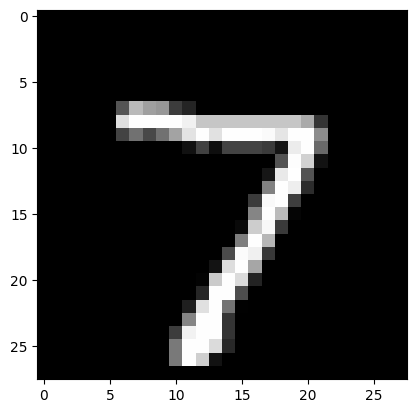

In [ ]:
# 展示用
x_sample_0 = first_test_data.reshape(28,28)
imshow(x_sample_0, cmap='gray')
print('Label:', int(first_test_label), ', Predicted:', int(pred_result[0]))

# 補充 -- 建立 model的方法

* <font color="red">不用**Input()** 與 用**Input()**</font>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, ReLU

noise_shape = (100,)
noise = Input(shape=noise_shape)

In [ ]:
noise.shape

(None, 100)

In [ ]:
# model_1 (不用Input(), 會有 Warning)
model_1 = Sequential()
model_1.add(Dense(16, activation='softmax', input_shape=(32,)))

model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 528 (2.06 KB)

 Trainable params: 528 (2.06 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model_2 (用Input())
x = Input(shape=(32,))
y = Dense(16, activation='softmax')(x)
model_2 = keras.Model(x, y )

model_2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 528 (2.06 KB)

 Trainable params: 528 (2.06 KB)

 Non-trainable params: 0 (0.00 B)

---

* 從原本 Notebook (04-feedforward-nn.ipynb) 複製過來的，忘了原本有何用處

In [ ]:
def build_generator(self):

    noise_shape = (100,)

    model = Sequential()

    model.add(Dense(256, input_shape=noise_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))

    model.add(Dense(np.prod(self.img_shape), activation='tanh'))
    model.add(Reshape(self.img_shape))

    model.summary()

    noise = Input(shape=noise_shape)
    img = model(noise)

    return Model(noise, img)
# noise = Input(shape=noise_shape)
# img = model(noise)

---

## <font color="pink">解決問題</font>
##### *"Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance."*
https://blog.csdn.net/weixin_43159148/article/details/89609870 <br>
https://stackoverflow.com/questions/61214575/keras-tensor-flow-2-configproto <br>

In [ ]:
import tensorflow as tf
import os
# NUM_PARALLEL_EXEC_UNITS =8
# config = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=NUM_PARALLEL_EXEC_UNITS, inter_op_parallelism_threads=2, allow_soft_placement=True, device_count = {'CPU': NUM_PARALLEL_EXEC_UNITS })
# session = tf.compat.v1.Session(config=config)
# tf.compat.v1.keras.backend.set_session(session)
tf.config.threading.set_inter_op_parallelism_threads(4)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# os.environ["OMP_NUM_THREADS"] = str(NUM_PARALLEL_EXEC_UNITS)

# os.environ["KMP_BLOCKTIME"] = "30"

# os.environ["KMP_SETTINGS"] = "1"

# os.environ["KMP_AFFINITY"]= "granularity=fine,verbose,compact,1,0"